In [15]:
# import libraries
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np

print("Imported successfully")

Imported successfully


# Linear Regression

<p> y = Ax + B </p>
<ul>
    <li> A = slope of curve </li>
    <li> A = bias (point that intersect y-axis) </li>
    <br>
<li> We have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
 </li>
 <li> The question is that what will be number of car sell if the car price is 10$.
 </li>
<ul>

In [18]:
# lets define car prices
car_prices = [3, 4, 5, 6, 7, 8, 9]
car_price_np = np.array(car_prices, dtype = np.float32)
car_price_np = car_price_np.reshape(-1, 1)

# convert the numpy array to tensor
priceTensor = Variable(torch.from_numpy(car_price_np))

In [19]:
# lets define the number of car sell
num_of_car_sell = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
num_of_car_sell_np = np.array(num_of_car_sell, dtype = np.float32)
num_of_car_sell_np = num_of_car_sell_np.reshape(-1, 1)

# convert the numpy array to tensor
numTensor = Variable(torch.from_numpy(num_of_car_sell_np))

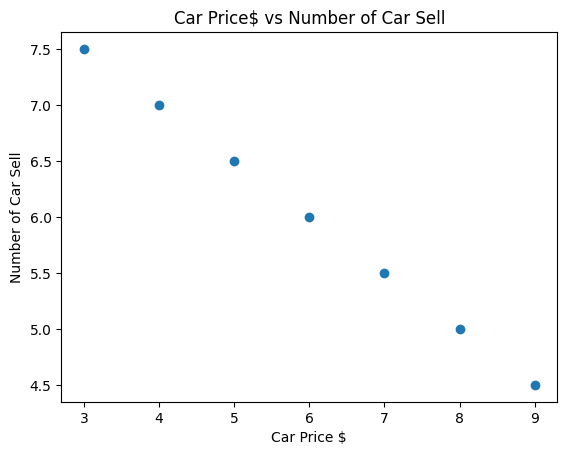

In [20]:
# let's visualize our data
plt.scatter(car_prices, num_of_car_sell)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ vs Number of Car Sell")
plt.show()

In [21]:
# create a class
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        
        # linear function
        self.linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.linear(x)
        

In [22]:
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

In [23]:
# define the loss function
mse = nn.MSELoss()

In [26]:
# set optimization parameters
lr = 0.02     # setting the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

In [27]:
# Train the model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
    
    # optimization
    optimizer.zero_grad()
    
    # forward to get output
    results = model(priceTensor)
    
    # calculate loss
    loss = mse(results, numTensor)
    
    # backward propagation
    loss.backward()
    
    # updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if (iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 107.7679443359375
epoch 50, loss 4.497802734375
epoch 100, loss 3.0393545627593994
epoch 150, loss 2.053819417953491
epoch 200, loss 1.387851595878601
epoch 250, loss 0.9378291368484497
epoch 300, loss 0.6337294578552246
epoch 350, loss 0.4282377362251282
epoch 400, loss 0.2893775403499603
epoch 450, loss 0.19554449617862701
epoch 500, loss 0.13213787972927094
epoch 550, loss 0.08929111063480377
epoch 600, loss 0.060337234288454056
epoch 650, loss 0.04077231138944626
epoch 700, loss 0.027551617473363876
epoch 750, loss 0.018617799505591393
epoch 800, loss 0.01258090604096651
epoch 850, loss 0.00850156880915165
epoch 900, loss 0.005744882859289646
epoch 950, loss 0.003882097778841853
epoch 1000, loss 0.0026233172975480556


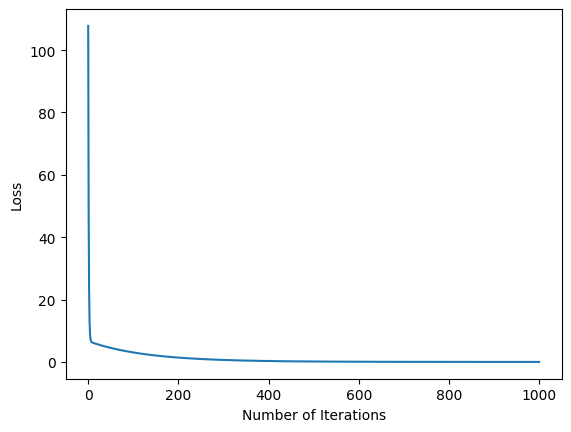

In [28]:
# plot to see how the loss function falls
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

In [29]:
#predict our car price
predicted = model(priceTensor).data.numpy()

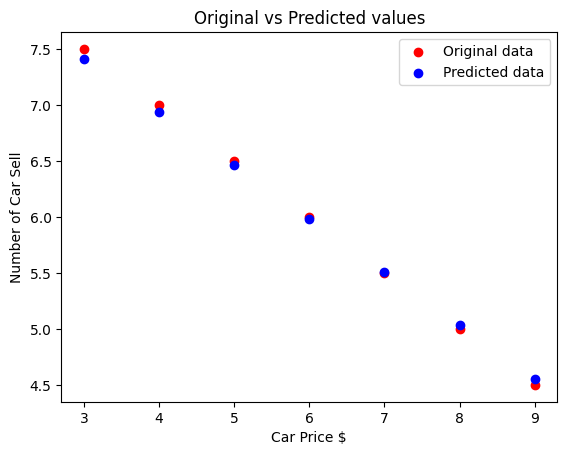

In [30]:
# plot 
plt.scatter(car_prices, num_of_car_sell, label="Original data", color = "red")
plt.scatter(car_prices, predicted, label = "Predicted data", color="blue")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [40]:
predicted_10 = model(torch.tensor([10.0], dtype=torch.float32)).data.numpy()
predicted_10

array([4.081258], dtype=float32)

# Tumor detection Classifier using Pytorch

In [43]:
!pip install pillow

In [82]:
# import libraries
import os
import glob
from PIL import Image
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torchvision.models as models

print("Libraries import successfully")

Libraries import successfully


In [83]:
# Define transformation

transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [84]:
# define the directory of your dataset
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            img_gray = img.convert("L")
            img_t = transform(img_gray)
            images.append(img_t)
    return images

# Load images from the 'no' and 'yes' folders
no_images = load_images_from_folder("C:/Users/infaw/Downloads/Tumor/brain_tumor_dataset/no")
yes_images = load_images_from_folder("C:/Users/infaw/Downloads/Tumor/brain_tumor_dataset/yes")


In [18]:
# create a class for the dateset

class TumorDataset(Dataset):
    def __init__(self, no_images, yes_images):
        self.no_images = no_images
        self.yes_images = yes_images
        
    def __len__(self):
        return len(self.no_images) + len(self.yes_images)
    
    def __getitem__(self, idx):
        if idx < len(self.no_images):
            return self.no_images[idx], 0  # return a "no" image and its label (0)
        else:
            return self.yes_images[idx - len(self.no_images)], 1 # return a "yes" image and its label (1)
        
# create the dataset
dataset = TumorDataset(no_images, yes_images)
    


In [78]:
# Define the model
class TumorClassifier(nn.Module):
    def __init__(self):
        super(TumorClassifier, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, 5)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.conv2 = torch.nn.Conv2d(6, 64, 5)
        self.fc1 = torch.nn.Linear(64*5*5, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        
        #x = torch.nn.functional.log_softmax(self.fc3(x), dim=1)
        return x

    
# Instantiate the model
model = TumorClassifier()

In [79]:
# Define the dataloader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

In [80]:
# Define the loss function and optimizers
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [85]:
# Training loop
for epoch in range(10):  # number of epochs
    running_loss = 0.0
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss/len(dataloader)}")
print("Finished Training")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x53824 and 1600x120)